# Title of the project: “Diabetes Patients”

About Dataset
This dataset is originally from the National Institute of Diabetes and Digestive and Kidney
Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes
based on certain diagnostic measurements included in the dataset. Several constraints were placed
on the selection of these instances from a larger database. In particular, all patients here are females
at least 21 years old of Pima Indian heritage


#### From the given dataset, 0 represents that the person is not diabetic and 1 shows that the person is diabetic

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../diabetes.csv')

In [4]:
#to check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


The dataset comprises 9 columns and 768 rows. Among these, 7 columns contain integer data types, while the remaining 2 columns contain float data types.

In [5]:
#To check the head of the data
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#To check the dimention of the data
df.shape

(768, 9)

In [9]:
#To check for missing value
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Based on the result above, it's evident that the data is clean, with no missing values.

In [12]:
#To check for the statistics of the data
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [13]:
#To check for correlation
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


### Data Visualization

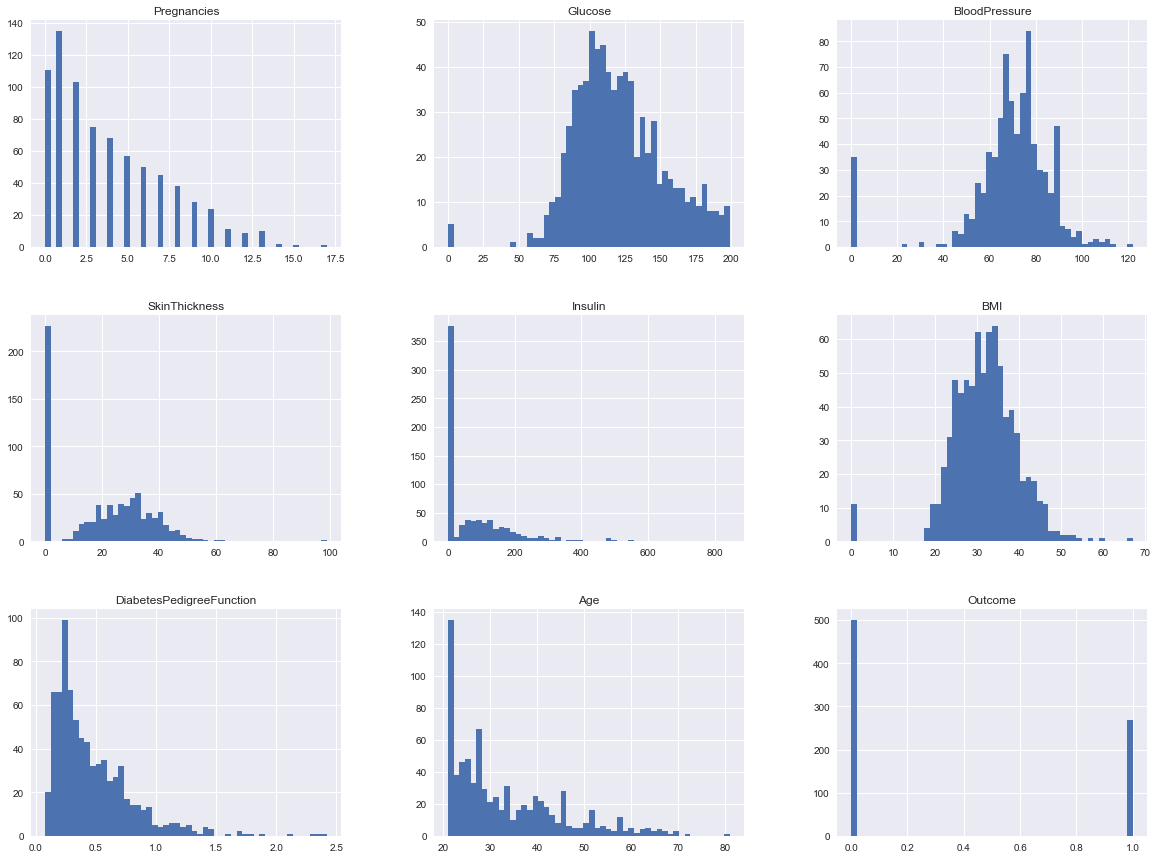

In [19]:
plt.style.use('seaborn')
df.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Heatmap showhing correlation of feactures with target')

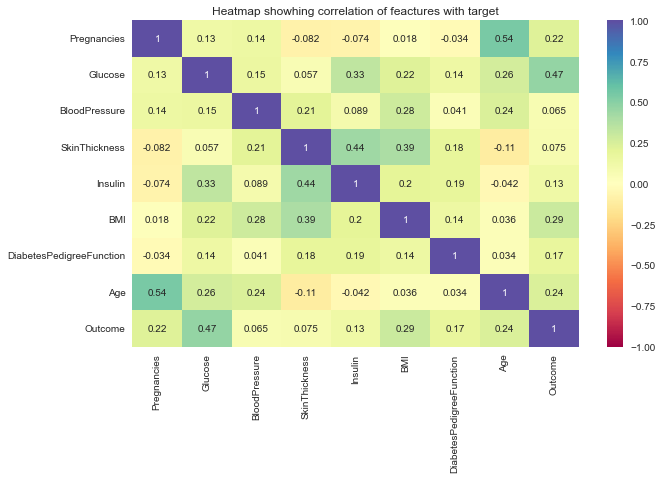

In [28]:
cor = df.corr()

plt.figure(figsize = (10, 6))
sns.heatmap(cor, annot = True, vmin = -1, vmax = 1, cmap = 'Spectral')
plt.title('Heatmap showhing correlation of feactures with target')

The heatmap reveals a 47% correlation between the "Pregnancies" variable and our target outcome. Additionally, there appears to be evidence of multicollinearity between "Pregnancies" and "Age," suggesting a strong correlation between these two features.

## Building the Model

In [31]:
#Slecting the features and target
X = df.drop('Outcome', axis = 1)
y = df['Outcome']

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, stratify = y)

In [42]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

In [44]:
from sklearn.preprocessing import MinMaxScaler
#To normalize the data
scaler = MinMaxScaler()

X_train_sd = scaler.fit_transform(X_train)
X_test_sd = scaler.transform(X_test)

### Building the Model

In [45]:
#To build the model
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(random_state = 0)

log_reg.fit(X_train_sd, y_train)

LogisticRegression(random_state=0)

In [46]:

from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def model_performance_classification(model, predictors, target, threshold=0.5):
    """
    Evaluate the performance of a classification model using various metrics.

    Args:
        model: A trained classification model.
        predictors: Independent variables.
        target: Dependent variable.
        threshold: Classification threshold (default is 0.5).

    Returns:
        df_perf: A DataFrame containing accuracy, recall, precision, and F1-score.
    """

    # Predict probabilities and convert to class
    pred_proba = model.predict_proba(predictors)[:, 1]
    pred_class = np.round(pred_proba > threshold)

    # Compute classification metrics
    acc = accuracy_score(target, pred_class)
    recall = recall_score(target, pred_class, average="weighted")
    precision = precision_score(target, pred_class, average="weighted", zero_division=0)
    f1 = f1_score(target, pred_class, average="weighted")

    # Create a DataFrame for metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": [acc],
            "Recall": [recall],
            "Precision": [precision],
            "F1-score": [f1],
        }
    )

    # Create and display the confusion matrix
    conf = confusion_matrix(target, pred_class)
    plt.figure(figsize=(8, 5))
    sns.heatmap(
        conf,
        annot=True,
        fmt="g",
        cmap=sns.color_palette("Blues", as_cmap=True),
        cbar=False,
    )
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.title("Confusion Matrix", fontweight="bold")
    plt.show()

    return df_perf

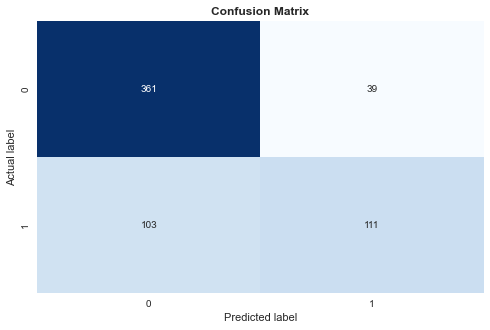

,Accuracy,Recall,Precision,F1-score
0,0.76873,0.76873,0.764767,0.756964


In [47]:
#To test the model on train data
log_reg_train = model_performance_classification(log_reg, X_train_sd, y_train)

log_reg_train

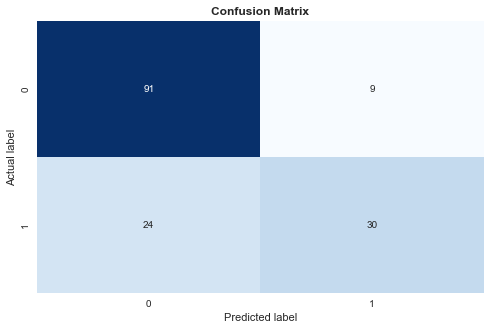

,Accuracy,Recall,Precision,F1-score
0,0.785714,0.785714,0.783564,0.775908


In [78]:
#To test the model on test data
log_reg_test = model_performance_classification(log_reg, X_test_sd, y_test)

log_reg_test

Accuracy: Based on the results above, if the model is provided with new data, it is expected to make accurate predictions of diabetes presence with an accuracy rate of 78%.

Precision: This indicates that among the patients the model predicted as having diabetes, it accurately identified 78% of them.

Recall: This reveals that among the patients with diabetes in our dataset, the model correctly identified 78% of them.

From the confusion matrix, the model made the following predictions:

Correctly predicted 91 patients as not having diabetes.
Correctly predicted 30 patients as having diabetes.
However, the model also made some incorrect predictions:

Wrongly predicted that 9 patients without diabetes actually have diabetes.
Wrongly predicted that 24 patients with diabetes do not have diabetes.



#### Note: From this model we have higer false postives which is not good, so there is still need for improvements

In [50]:
#To make a prediction
log_reg.predict(X_test_sd)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0],
      dtype=int64)

In [52]:
#To check the prediction probabilty
log_reg.predict_proba(X_test_sd)

array([[0.77177746, 0.22822254],
       [0.65503234, 0.34496766],
       [0.91518469, 0.08481531],
       [0.80750112, 0.19249888],
       [0.7644991 , 0.2355009 ],
       [0.66368676, 0.33631324],
       [0.56269914, 0.43730086],
       [0.80583883, 0.19416117],
       [0.90883692, 0.09116308],
       [0.52778478, 0.47221522],
       [0.9055254 , 0.0944746 ],
       [0.78834137, 0.21165863],
       [0.43771414, 0.56228586],
       [0.75356605, 0.24643395],
       [0.56749964, 0.43250036],
       [0.84768058, 0.15231942],
       [0.66872315, 0.33127685],
       [0.5946355 , 0.4053645 ],
       [0.71774035, 0.28225965],
       [0.46333017, 0.53666983],
       [0.36528319, 0.63471681],
       [0.75289696, 0.24710304],
       [0.26771024, 0.73228976],
       [0.84504809, 0.15495191],
       [0.40964284, 0.59035716],
       [0.29777234, 0.70222766],
       [0.91108648, 0.08891352],
       [0.83877297, 0.16122703],
       [0.89129253, 0.10870747],
       [0.27933701, 0.72066299],
       [0.

### For Model Improvement

In [54]:
y.value_counts(normalize = True)

0    0.651042
1    0.348958
Name: Outcome, dtype: float64

Note that we have an class implanced in which the Class 0 is 65% and Class 1 is 34%, So SMOTE need to be apply to balanced the data

In [56]:
from imblearn.over_sampling import SMOTE
#To apply SMOTE
smote = SMOTE(random_state=0)

X_sm, y_sm = smote.fit_resample(X,y)

In [62]:
y_sm.value_counts(normalize =True)

1    0.5
0    0.5
Name: Outcome, dtype: float64

In [57]:
#To split the data
X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm,y_sm, test_size = 0.2,)

In [58]:
#To normalize the data
scaler = MinMaxScaler()

X_train_sd_sm = scaler.fit_transform(X_train_sm)
X_test_sd_sm = scaler.transform(X_test_sm)

In [59]:
log_reg2 = LogisticRegression(random_state = 0)

log_reg2.fit(X_train_sd_sm, y_train_sm)

LogisticRegression(random_state=0)

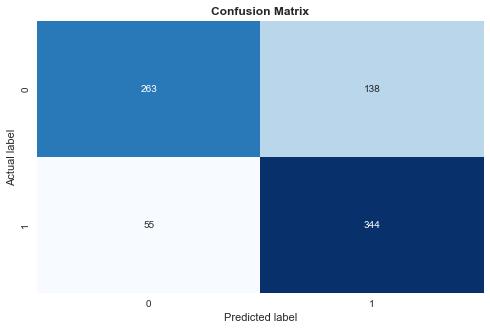

,Accuracy,Recall,Precision,F1-score
0,0.75875,0.75875,0.77051,0.756189


In [71]:
#To test the model on train data
log_reg_train2 = model_performance_classification(log_reg2, X_train_sd_sm, y_train_sm, threshold=0.4)

log_reg_train2

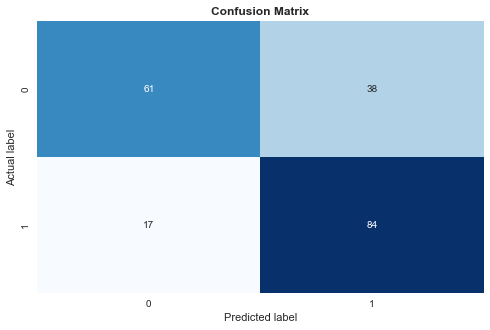

,Accuracy,Recall,Precision,F1-score
0,0.725,0.725,0.73482,0.721635


In [69]:
#To test the model on test data
log_reg_test2 = model_performance_classification(log_reg2, X_test_sd_sm, y_test_sm, threshold=0.4)

log_reg_test2

Accuracy: Based on the results above, if the model is provided with new data, it is expected to make accurate predictions of diabetes presence with an accuracy rate of 72%.

Precision: This indicates that among the patients the model predicted as having diabetes, it accurately identified 73% of them.

Recall: This reveals that among the patients with diabetes in our dataset, the model correctly identified 72% of them.

From the confusion matrix, the model made the following predictions:

Correctly predicted 61 patients as not having diabetes.
Correctly predicted 84 patients as having diabetes.
However, the model also made some incorrect predictions:

Wrongly predicted that 38 patients without diabetes actually have diabetes.
Wrongly predicted that 17 patients with diabetes do not have diabetes.



### Feature Importance

In [76]:
#To get the coefficients
coefficients = log_reg2.coef_[0]  # Get the coefficients

# Pair feature names with their coefficients
feature_importance = list(zip(feature_names, coefficients))

# Sort by absolute coefficient values to identify important features
feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Print or visualize the feature importance
for feature, importance in feature_importance:
    print(f"{feature}: {importance}")


Glucose: 5.228369267645903
BMI: 3.4155741655567695
DiabetesPedigreeFunction: 1.5836866912002752
Pregnancies: 1.5750699910039874
Age: 1.3596191180413042
BloodPressure: -0.5176087929748184
SkinThickness: 0.4798929339654121
Insulin: 0.028610546491127816


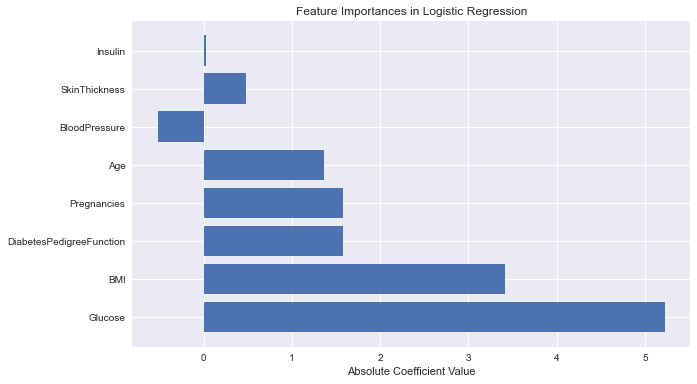

In [77]:
# Sort by absolute coefficient values
feature_importance = sorted(feature_importance, key=lambda x: abs(x[1]), reverse=True)

# Extract feature names and absolute coefficients
feature_names, coefficients = zip(*feature_importance)

# Create a horizontal bar plot
plt.figure(figsize=(10, 6))
plt.barh(range(len(feature_names)), coefficients, align='center')
plt.yticks(range(len(feature_names)), feature_names)
plt.xlabel('Absolute Coefficient Value')
plt.title('Feature Importances in Logistic Regression')

plt.show()


The plot above reveals that the most influential features for model building are Age, Pregnancies, DiabetesPedigreeFunction, BMI, and Glucose. These features exhibit the highest absolute coefficient values in the logistic regression model, indicating their significance in making predictions.